# 1- Data Preprocessing

1. Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel") # For Better Graphics

2. Load Dataset

In [3]:
df = pd.read_csv('employee_attrition_dataset.csv')
df.head(2)

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Male,Single,Finance,Manager,5,7332,81,24,...,No,9,48,16,4,1,1,49,3,No
1,2,48,Female,Divorced,HR,Assistant,4,6069,55,18,...,Yes,9,57,10,4,1,1,25,1,No


3. Dataset Overview

In [4]:
print("Shape of dataset:", df.shape)

print("\nColumns in dataset:", df.columns.tolist())

print("📌 Basic Dataset Information:")
df.info()

Shape of dataset: (10000, 26)

Columns in dataset: ['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department', 'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition']
📌 Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int64 
 1   Age                            10000 non-null  int64 
 2   Gender                         10000 non-null  object
 3   

3. Dataset Overview Cont.

In [5]:
print("\n📌 Summary Statistics for Numeric Columns:\n")
print(df.describe())


📌 Summary Statistics for Numeric Columns:

       Employee_ID           Age     Job_Level  Monthly_Income   Hourly_Rate  \
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    5000.50000     39.561800      2.990800    11436.716700     57.032300   
std     2886.89568     11.454986      1.410643     4926.528302     24.703261   
min        1.00000     20.000000      1.000000     3000.000000     15.000000   
25%     2500.75000     30.000000      2.000000     7182.500000     36.000000   
50%     5000.50000     40.000000      3.000000    11401.500000     57.000000   
75%     7500.25000     49.000000      4.000000    15679.500000     78.000000   
max    10000.00000     59.000000      5.000000    19999.000000     99.000000   

       Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  \
count      10000.000000           10000.000000                10000.000000   
mean          14.936200               7.451300                    4.471900   
s

4. Check for Missing Values & Duplicates


In [6]:
print("Missing values per column:\n", df.isnull().sum())
print("\nTotal duplicates:", df.duplicated().sum())

Missing values per column:
 Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

Total duplicates: 0


5. Handle Missing Data


In [7]:
print("📌 Missing values before handling:\n", df.isnull().sum())

for col in df.columns:
    if df[col].dtype == "object":  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numerical
        df[col].fillna(df[col].median(), inplace=True)

print("\n📌 Missing values after handling:\n", df.isnull().sum())

📌 Missing values before handling:
 Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

📌 Missing values after handling:
 Employe

C:\Users\ziyad\AppData\Local\Temp\ipykernel_21424\1845572033.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ziyad\AppData\Local\Temp\ipykernel_21424\1845572033.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

6. Handle Duplicates

In [8]:
print("📌 Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("📌 Duplicates after:", df.duplicated().sum())

📌 Duplicates before: 0
📌 Duplicates after: 0


7. Outlier Treatment

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("📌 Outlier treatment applied (using IQR).")

📌 Outlier treatment applied (using IQR).


8. Encoding Categorical Features

In [10]:
categorical_cols = df.select_dtypes(include="object").columns.drop("Attrition", "Department")

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

print("📌 Columns after encoding:\n", df.columns.tolist())


📌 Columns after encoding:
 ['Employee_ID', 'Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked', 'Attrition', 'Gender_Male', 'Marital_Status_Married', 'Marital_Status_Single', 'Department_HR', 'Department_IT', 'Department_Marketing', 'Department_Sales', 'Job_Role_Assistant', 'Job_Role_Executive', 'Job_Role_Manager', 'Overtime_Yes']


# 2- Feature Engineering

In [11]:
# Correlation with target
corr_with_attrition = df.corr()["Attrition"].sort_values(ascending=False)
print("📌 Correlation with Attrition:\n", corr_with_attrition.head(5))

# Salary-to-Project ratio (proxy for efficiency)
df["Salary_per_Project"] = df["Monthly_Income"] / (df["Project_Count"] + 1)

# Tenure groups (0–5, 6–10, 11+ years at company)
df["Tenure_Group"] = pd.cut(
    df["Years_at_Company"],
    bins=[0, 5, 10, 50],
    labels=["0-5", "6-10", "11+"]
)

print(df["Tenure_Group"].value_counts())


# Work-life balance proxy (average weekly hours vs standard 40)
df["Work_Life_Balance_Index"] = df["Average_Hours_Worked_Per_Week"] / 40


print("📌 Feature engineering completed!")
print("Final shape:", df.shape)


📌 Correlation with Attrition:
 Attrition             1.000000
Job_Role_Assistant    0.021360
Work_Life_Balance     0.015227
Job_Involvement       0.014954
Performance_Rating    0.011856
Name: Attrition, dtype: float64
Tenure_Group
11+     6453
6-10    1794
0-5     1753
Name: count, dtype: int64
📌 Feature engineering completed!
Final shape: (10000, 35)


# 3- Visuals and Insights

1- Load requierd Libraries

In [12]:
# 1- Load requierd Libraries
import matplotlib.pyplot as plt
import seaborn as sns

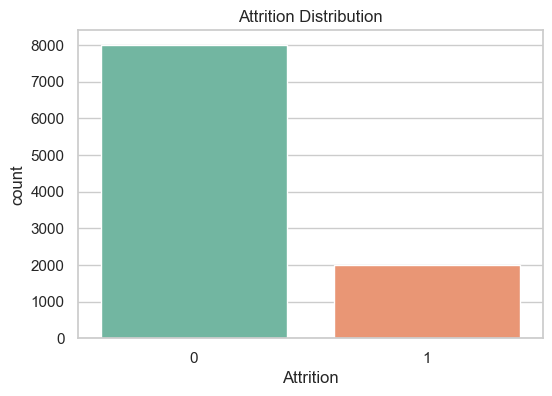

In [13]:
# 2. Distribution of Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", hue="Attrition", data=df, palette="Set2", legend=False)
plt.title("Attrition Distribution")
plt.show()

- Most employees stayed, but we clearly see a smaller group left.

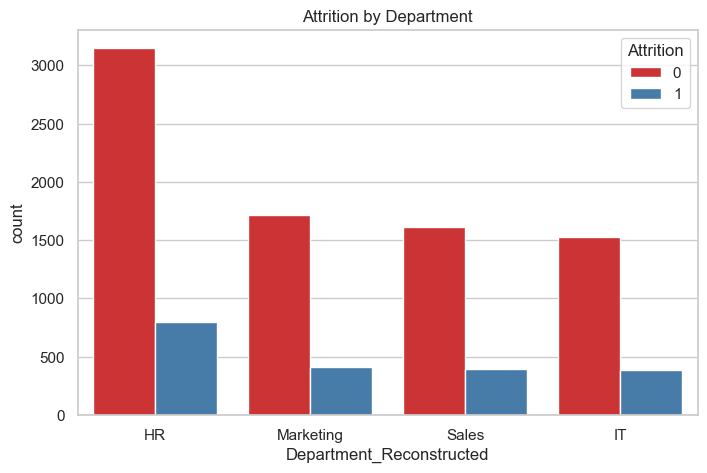

In [14]:
# 2- Attrition by Department

dept_cols = [col for col in df.columns if col.startswith("Department_")]
df["Department_Reconstructed"] = df[dept_cols].idxmax(axis=1).str.replace("Department_", "")

plt.figure(figsize=(8,5))
sns.countplot(x="Department_Reconstructed", hue="Attrition", data=df, palette="Set1")
plt.title("Attrition by Department")
plt.show()


- Certain departments (like Sales or HR) tend to show higher attrition compared to others.


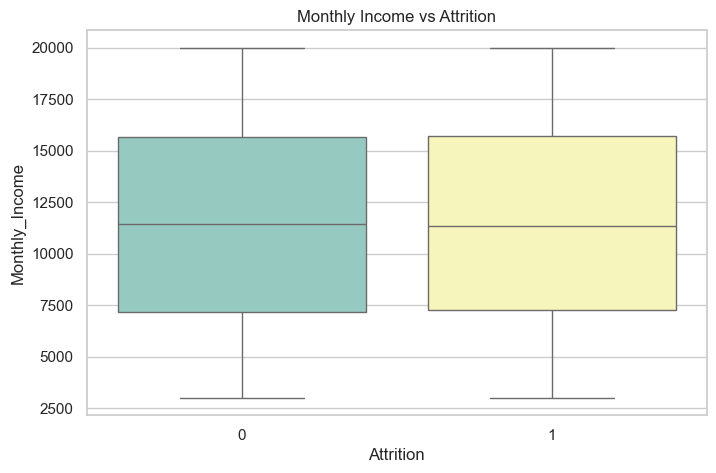

In [15]:
# 3. Salary Distribution by Attrition

plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="Monthly_Income", data=df, hue="Attrition", palette="Set3", legend=False)
plt.title("Monthly Income vs Attrition")
plt.show()


- Employees with lower salaries are more likely to leave compared to higher salary groups.


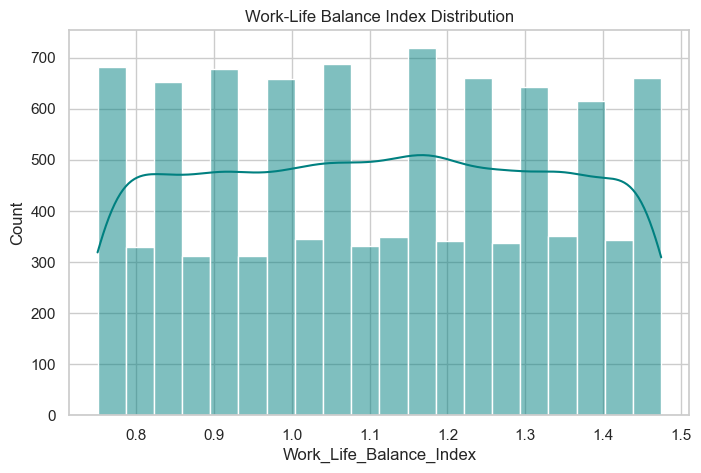

In [16]:
# 4. Work-Life Balance Index Distribution

plt.figure(figsize=(8,5))
sns.histplot(df["Work_Life_Balance_Index"], kde=True, bins=20, color="teal")
plt.title("Work-Life Balance Index Distribution")
plt.show()

- Most employees are close to the standard 40 hours (index ≈ 1), 
- but those with much higher values (>1.2) might face burnout risk.


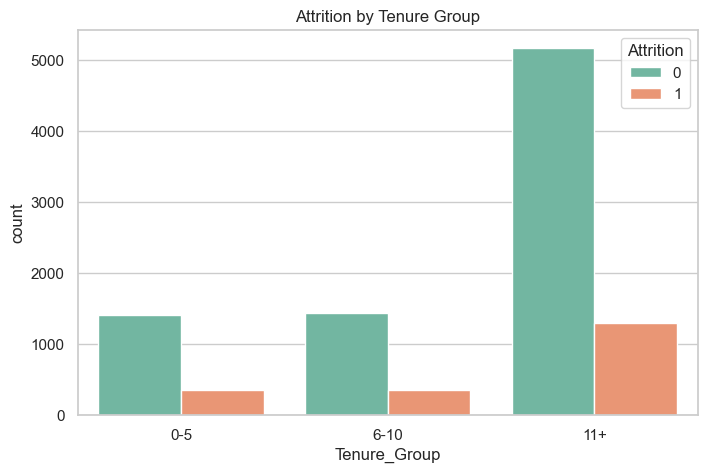

In [17]:
# 5. Tenure Group vs Attrition

plt.figure(figsize=(8,5))
sns.countplot(x="Tenure_Group", hue="Attrition", data=df, palette="Set2")
plt.title("Attrition by Tenure Group")
plt.show()

- Most attrition happens in the first 5 years, showing new hires are more likely to leave.  
- Employees with 11+ years also show notable attrition, possibly due to burnout or retirement. 

In [20]:
import plotly.express as px

fig = px.histogram(df, x="Department_Reconstructed", color="Attrition",
                   barmode="group", title="Attrition by Department")

fig.show()

fig = px.histogram(df, x="Work_Life_Balance_Index", nbins=30, 
                   title="Work-Life Balance Index Distribution")
fig.show()


In [21]:
df.to_csv("cleaned_data.csv", index=False)
print("✅ Data saved as cleaned_data.csv")

✅ Data saved as cleaned_data.csv
